# Weather

**Knock airport Weather**

![knock Airport](https://img.rasset.ie/0013f339-800.jpg)

Create a python file or notebook called assignment_6_Weather (.py or .ipynb)

Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv


**Tasks**

Plot:

1. The temperature
1. The mean temperature each day
1. The mean temperature for each month
60% of the marks will be given for the above

For the last 40%

Plot:

1. The Windspeed (there is data missing from this column)
1. The rolling windspeed (say over 24 hours)
1. The max windspeed for each day
1. The monthly mean of the daily max windspeeds 



In [1]:
#Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#Import the dataset

df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=23, skipinitialspace=True) 
#skiprows=24 is used to skip the first 24 rows of the dataset as they are just used for metadata
#low_memory=False is used to ensure that the data is read in as a single data type

#We need to rename the columns of the dataset as they are not properly named - use the metadata to do this
df.columns = ['Date/Time (utc)', 'Indicator', 'Precipitation Amount (mm)', 'Indicator', 'Temperature (°C)', 'Indicator', 'Wet Bulb Temperature (°C)', 'Dew Point Temp (°C)', 'Vapour Pressure (hPa)','Relative Humidity (%)', 'Mean Sea Level Pressure (hPa)','Indicator', 'Mean Wind Speed (knot)', 'Indicator', 'Predominant Wind Direction (deg)', 'Present Weather', 'Past Weather', 'Sunshine duration (hours)', 'Visibility', 'Cloud Height (ft * 100s)', 'Cloud amount']
df.head()


,Date/Time (utc),Indicator,Precipitation Amount (mm),Indicator,Temperature (°C),Indicator,Wet Bulb Temperature (°C),Dew Point Temp (°C),Vapour Pressure (hPa),Relative Humidity (%),...,Indicator,Mean Wind Speed (knot),Indicator,Predominant Wind Direction (deg),Present Weather,Past Weather,Sunshine duration (hours),Visibility,Cloud Height (ft * 100s),Cloud amount
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0.0,0,0.0,25.0,81.0,0.0,35000.0,32.0,5.0
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0.0,0,0.0,25.0,82.0,0.0,40000.0,45.0,5.0
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0.0,0,0.0,80.0,81.0,0.0,8000.0,32.0,7.0
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0.0,0,0.0,25.0,82.0,0.0,28000.0,35.0,6.0
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0.0,0,0.0,2.0,11.0,0.0,40000.0,40.0,6.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246930 entries, 0 to 246929
Data columns (total 21 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Date/Time (utc)                   246930 non-null  object 
 1   Indicator                         246930 non-null  int64  
 2   Precipitation Amount (mm)         246881 non-null  float64
 3   Indicator                         246930 non-null  int64  
 4   Temperature (°C)                  246930 non-null  float64
 5   Indicator                         246930 non-null  int64  
 6   Wet Bulb Temperature (°C)         246930 non-null  float64
 7   Dew Point Temp (°C)               246930 non-null  float64
 8   Vapour Pressure (hPa)             246930 non-null  float64
 9   Relative Humidity (%)             246930 non-null  int64  
 10  Mean Sea Level Pressure (hPa)     246912 non-null  float64
 11  Indicator                         246930 non-null  i

In [4]:
#Check for missing values. We can see that there is a lot of missing data in the dataset
df.isna().sum()

Date/Time (utc)                         0
Indicator                               0
Precipitation Amount (mm)              49
Indicator                               0
Temperature (°C)                        0
Indicator                               0
Wet Bulb Temperature (°C)               0
Dew Point Temp (°C)                     0
Vapour Pressure (hPa)                   0
Relative Humidity (%)                   0
Mean Sea Level Pressure (hPa)          18
Indicator                               0
Mean Wind Speed (knot)                 50
Indicator                               0
Predominant Wind Direction (deg)       52
Present Weather                     54712
Past Weather                        54713
Sunshine duration (hours)               0
Visibility                          61807
Cloud Height (ft * 100s)               18
Cloud amount                           18
dtype: int64

In [5]:
#Convert the Date/Time column to a datetime object.
#This will convert the date time from the current format to a datetime object which will allow us to perform time series analysis on the data
#The format parameter is used to specify the format of the date time in the dataset

df['Date/Time (utc)'] = pd.to_datetime(df['Date/Time (utc)'], format='%d-%b-%Y %H:%M')
print(df['Date/Time (utc)'])

0        1996-04-10 14:00:00
1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
                 ...        
246925   2024-09-30 20:00:00
246926   2024-09-30 21:00:00
246927   2024-09-30 22:00:00
246928   2024-09-30 23:00:00
246929   2024-10-01 00:00:00
Name: Date/Time (utc), Length: 246930, dtype: datetime64[ns]


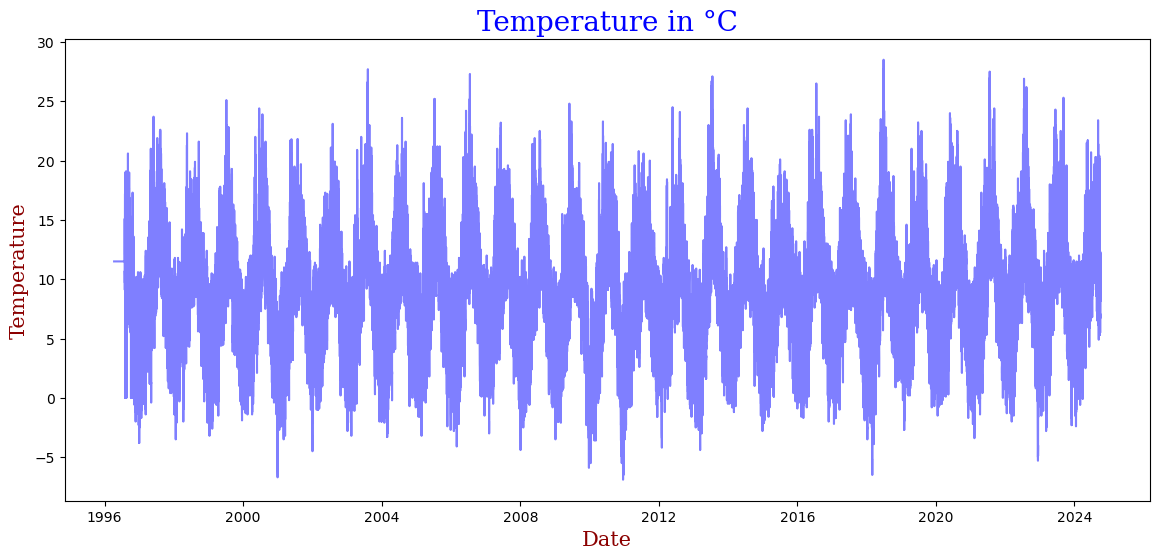

In [6]:
# Extract only the date (without time) for plotting
df['Date_only'] = df['Date/Time (utc)'].dt.date

#Plot the temperature data
fig, ax = plt.subplots(figsize=(14, 6))

#Set the colors for the pie chart.
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}


ax.plot(df['Date_only'], df['Temperature (°C)'], color='blue', alpha=0.5)
ax.set_title('Temperature in °C', fontdict = font1)
ax.set_xlabel('Date' , fontdict = font2)
ax.set_ylabel('Temperature', fontdict = font2);

In [7]:
#Set the Date/Time column as the index of the dataframe. This will allow us to perform time series analysis on the data
df.set_index('Date/Time (utc)', inplace=True)

In [8]:
#Calculate the mean temperature for each day.
#We can use the resample method to calculate the mean temperature for each day
#The 'D' parameter is used to specify that we want to resample the data by day
meantemp_daily = df['Temperature (°C)'].resample('D').mean()

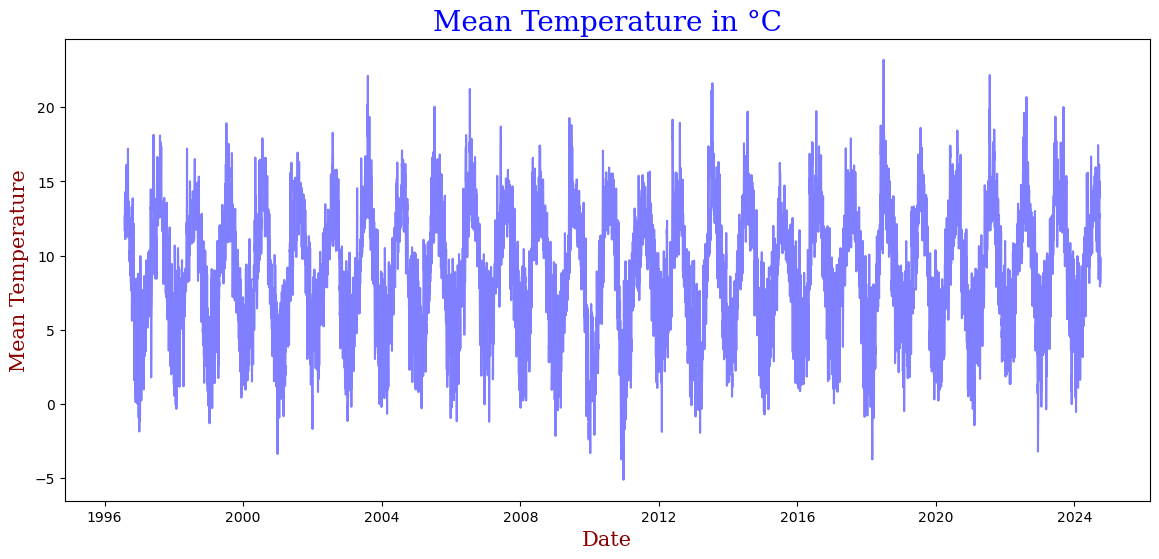

In [13]:
#Plot the mean temperature data
fig, ax = plt.subplots(figsize=(14, 6))

#Set the colors for the pie chart.
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

ax.plot(meantemp_daily.index, meantemp_daily, color='blue', alpha=0.5)
ax.set_title('Mean Temperature in °C', fontdict = font1)
ax.set_xlabel('Date', fontdict = font2)
ax.set_ylabel('Mean Temperature', fontdict = font2);



(array([  0,   8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96,
        104, 112, 120, 128, 136, 144, 152, 160, 168, 176, 184, 192, 200,
        208, 216, 224, 232, 240, 248, 256, 264, 272, 280, 288, 296, 304,
        312, 320, 328, 336]),
 [Text(0, 0, '1996-04-30'),
  Text(8, 0, '1996-12-31'),
  Text(16, 0, '1997-08-31'),
  Text(24, 0, '1998-04-30'),
  Text(32, 0, '1998-12-31'),
  Text(40, 0, '1999-08-31'),
  Text(48, 0, '2000-04-30'),
  Text(56, 0, '2000-12-31'),
  Text(64, 0, '2001-08-31'),
  Text(72, 0, '2002-04-30'),
  Text(80, 0, '2002-12-31'),
  Text(88, 0, '2003-08-31'),
  Text(96, 0, '2004-04-30'),
  Text(104, 0, '2004-12-31'),
  Text(112, 0, '2005-08-31'),
  Text(120, 0, '2006-04-30'),
  Text(128, 0, '2006-12-31'),
  Text(136, 0, '2007-08-31'),
  Text(144, 0, '2008-04-30'),
  Text(152, 0, '2008-12-31'),
  Text(160, 0, '2009-08-31'),
  Text(168, 0, '2010-04-30'),
  Text(176, 0, '2010-12-31'),
  Text(184, 0, '2011-08-31'),
  Text(192, 0, '2012-04-30'),
  Text(200, 0, '

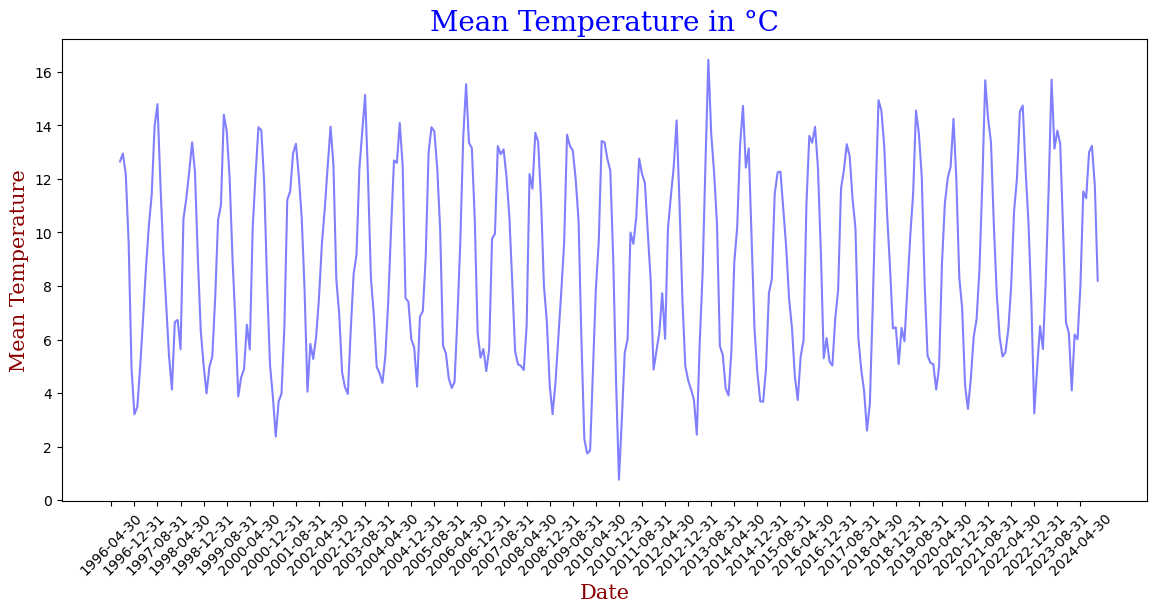

In [21]:
#Calculate the mean temperature for each month.
#We can use the resample method to calculate the mean temperature for each month
#The 'M' parameter is used to specify that we want to resample the data by month
meantemp_mounthly = df['Temperature (°C)'].resample('M').mean()

#Plot the mean temperature data
fig, ax = plt.subplots(figsize=(14, 6))

#Set the colors for the pie chart.
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Plot the mean temperature data
ax.plot(meantemp_mounthly.index.astype(str), meantemp_mounthly, color='blue', alpha=0.5)
ax.set_title('Mean Temperature in °C', fontdict = font1)
ax.set_xlabel('Date', fontdict = font2)
ax.set_ylabel('Mean Temperature', fontdict = font2)
#Set the x-axis to show only every 6th month
ax.set_xticks(ax.get_xticks()[::8])
plt.xticks(rotation=45)



### End